In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [59]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

# Set pandas display options
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)

In [60]:
# Import csv dataset
housing_data = pd.read_csv("train.csv")
housing_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [61]:
housing_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


### Step 1: Data Cleaning

In [62]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

#### Drop duplicate rows

In [63]:
housing_data.drop_duplicates()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,NaN,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,GasA,Gd,

In [64]:
# Remove Id column as it doesn't contribute to model building.
housing_data.drop(columns=["Id"], inplace = True)
housing_data.shape

(1460, 80)

#### Remove columns with missing values above a threshold

In [65]:
# Remove columns with more than 60% missing values
null_threshold = 60
min_non_null_count = int(((100 - null_threshold) / 100) * housing_data.shape[0] + 1)
max_null_count = housing_data.shape[0] - min_non_null_count
dropped_columns = []
for column in housing_data.columns:
    if housing_data[column].isna().sum() >= max_null_count:
        print("Dropped column:", column, housing_data[column].isna().sum())
        dropped_columns.append(column)

housing_data.dropna(axis = 1, thresh = min_non_null_count, inplace = True)
print(housing_data.shape)

Dropped column: Alley 1369
Dropped column: PoolQC 1453
Dropped column: Fence 1179
Dropped column: MiscFeature 1406
(1460, 76)


#### Impute missing values in columns

In [66]:
null_value_df = housing_data.isnull().any()
null_value_columns = []
for column in housing_data.columns:
    if null_value_df[column]:
        null_value_columns.append(column)

null_value_columns

['LotFrontage',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond']

In [67]:
categorical_columns = ["MasVnrType", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "Electrical", "FireplaceQu", "GarageType", "GarageYrBlt", "GarageFinish", "GarageQual", "GarageCond"];
numerical_columns = ["LotFrontage", "MasVnrArea"]

# Fill missing values in numerical columns with median.
for column in numerical_columns:
    housing_data[column] = housing_data[column].fillna(housing_data[column].median())

# Fill missing values in categorical columns with mode.
for column in categorical_columns:
    housing_data[column] = housing_data[column].fillna(housing_data[column].mode()[0])

In [68]:
# Check if still there are null values.
print("Count of null values after missing value imputation =", housing_data.isnull().sum().sum())

Count of null values after missing value imputation = 0


In [69]:
# Convert MSSubClass to categorical string data for EDA and model building
print("Column values before conversion\n", housing_data["MSSubClass"].value_counts())
col_data_dict = {
                    "20": "1 story new", 
                    "30": "1 story old", 
                    "40": "1 story all ages", 
                    "45": "1.5 story unfinished all ages",
                    "50": "1.5 story finished all ages", 
                    "60": "2 story new", 
                    "70": "2 story old", 
                    "75": "2.5 story all ages",
                    "80": "split multilevel", 
                    "85": "split foyer", 
                    "90": "duplex all styles", 
                    "120": "1 story pud new",
                    "150": "1.5 story pud all ages", 
                    "160": "2 story pud new", 
                    "189": "pud multilevel", 
                    "190": "2 family conversion all ages"
                }

housing_data["MSSubClass"] = housing_data["MSSubClass"].astype("str")
housing_data["MSSubClass"] = housing_data["MSSubClass"].map(col_data_dict)

print("Column values after conversion\n", housing_data["MSSubClass"].value_counts())

Column values before conversion
 MSSubClass
20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: count, dtype: int64
Column values after conversion
 MSSubClass
1 story new                      536
2 story new                      299
1.5 story finished all ages      144
1 story pud new                   87
1 story old                       69
2 story pud new                   63
2 story old                       60
split multilevel                  58
duplex all styles                 52
2 family conversion all ages      30
split foyer                       20
2.5 story all ages                16
1.5 story unfinished all ages     12
1 story all ages                   4
Name: count, dtype: int64


### Step 2: Exploratory Data Analysis

<Figure size 8000x4800 with 0 Axes>

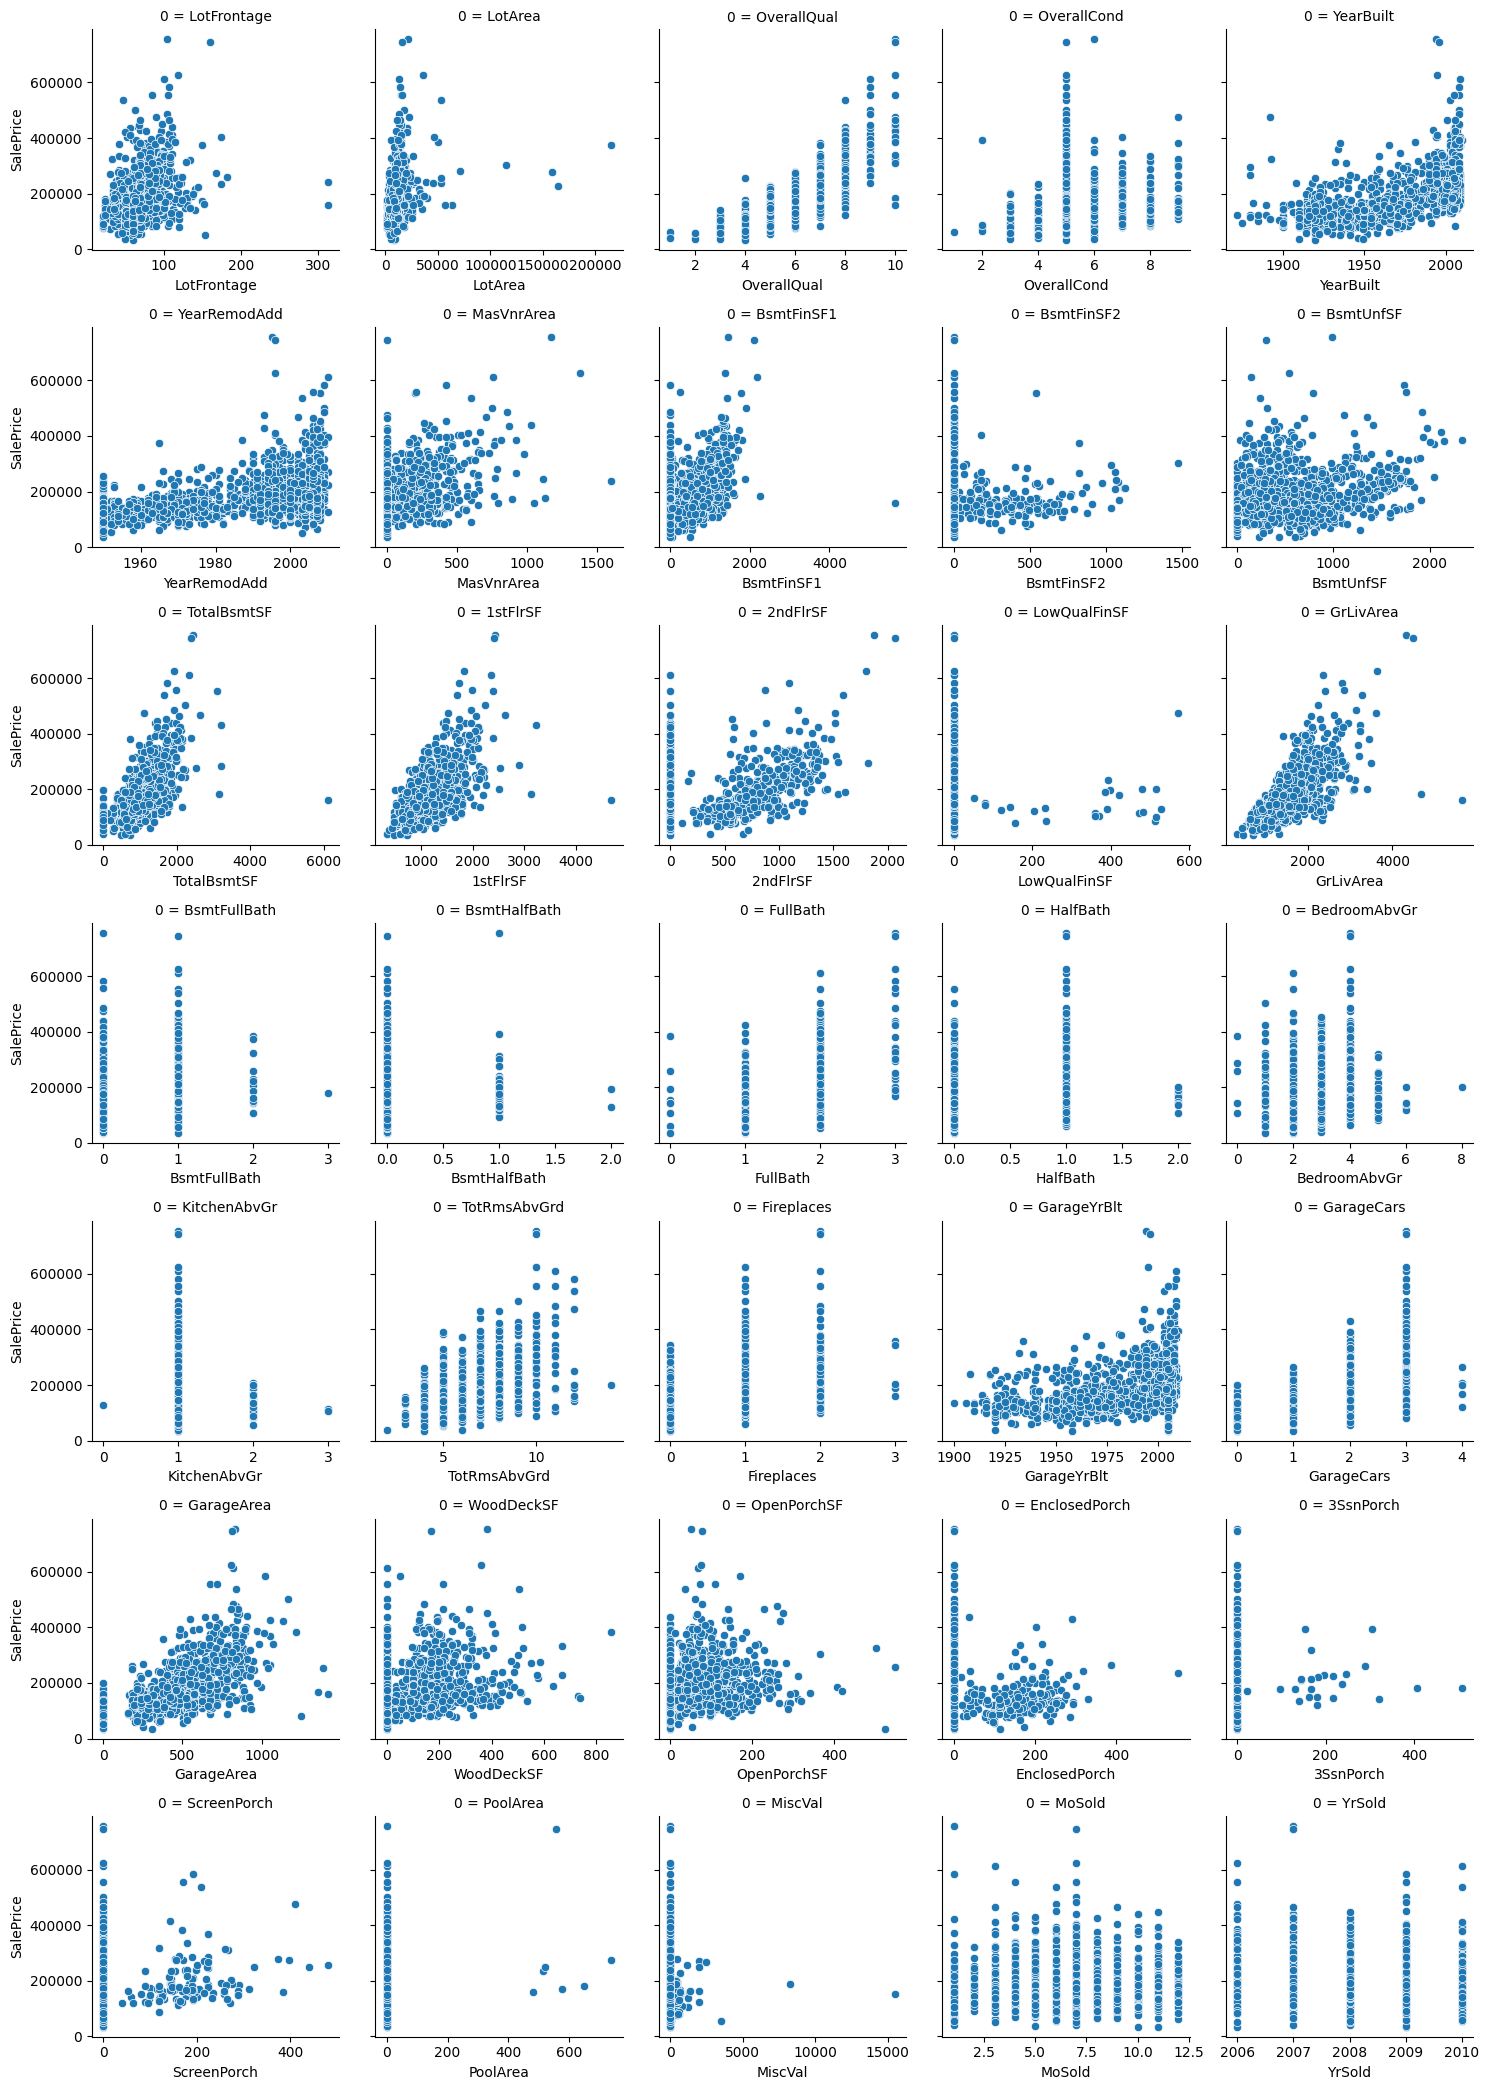

In [70]:
# See visual relationship between numerical variables and Sale Price.
numerical_columns = numerical_columns = ["LotFrontage", "LotArea", "OverallQual", "OverallCond", "YearBuilt", "YearRemodAdd", "MasVnrArea", "BsmtFinSF1", "BsmtFinSF2", "BsmtUnfSF", "TotalBsmtSF", "1stFlrSF", "2ndFlrSF", "LowQualFinSF", "GrLivArea", "BsmtFullBath", "BsmtHalfBath", "FullBath", "HalfBath", "BedroomAbvGr", "KitchenAbvGr", "TotRmsAbvGrd", "Fireplaces", "GarageYrBlt", "GarageCars", "GarageArea", "WoodDeckSF", "OpenPorchSF", "EnclosedPorch", "3SsnPorch", "ScreenPorch", "PoolArea", "MiscVal", "MoSold", "YrSold"]
plt.figure(figsize=(80, 48))
g = sns.FacetGrid(pd.DataFrame(numerical_columns), col=0, col_wrap=5, sharex=False)
for ax, x_var in zip(g.axes, numerical_columns):
    sns.scatterplot(data=housing_data, x=x_var, y="SalePrice", ax=ax)
g.tight_layout()
plt.show()

#### Observations:
1. We can see that Sales Price follows some sort of linear relationship with most of the numerical variables like basement area, living area, garage area, year build, year remodeled etc.

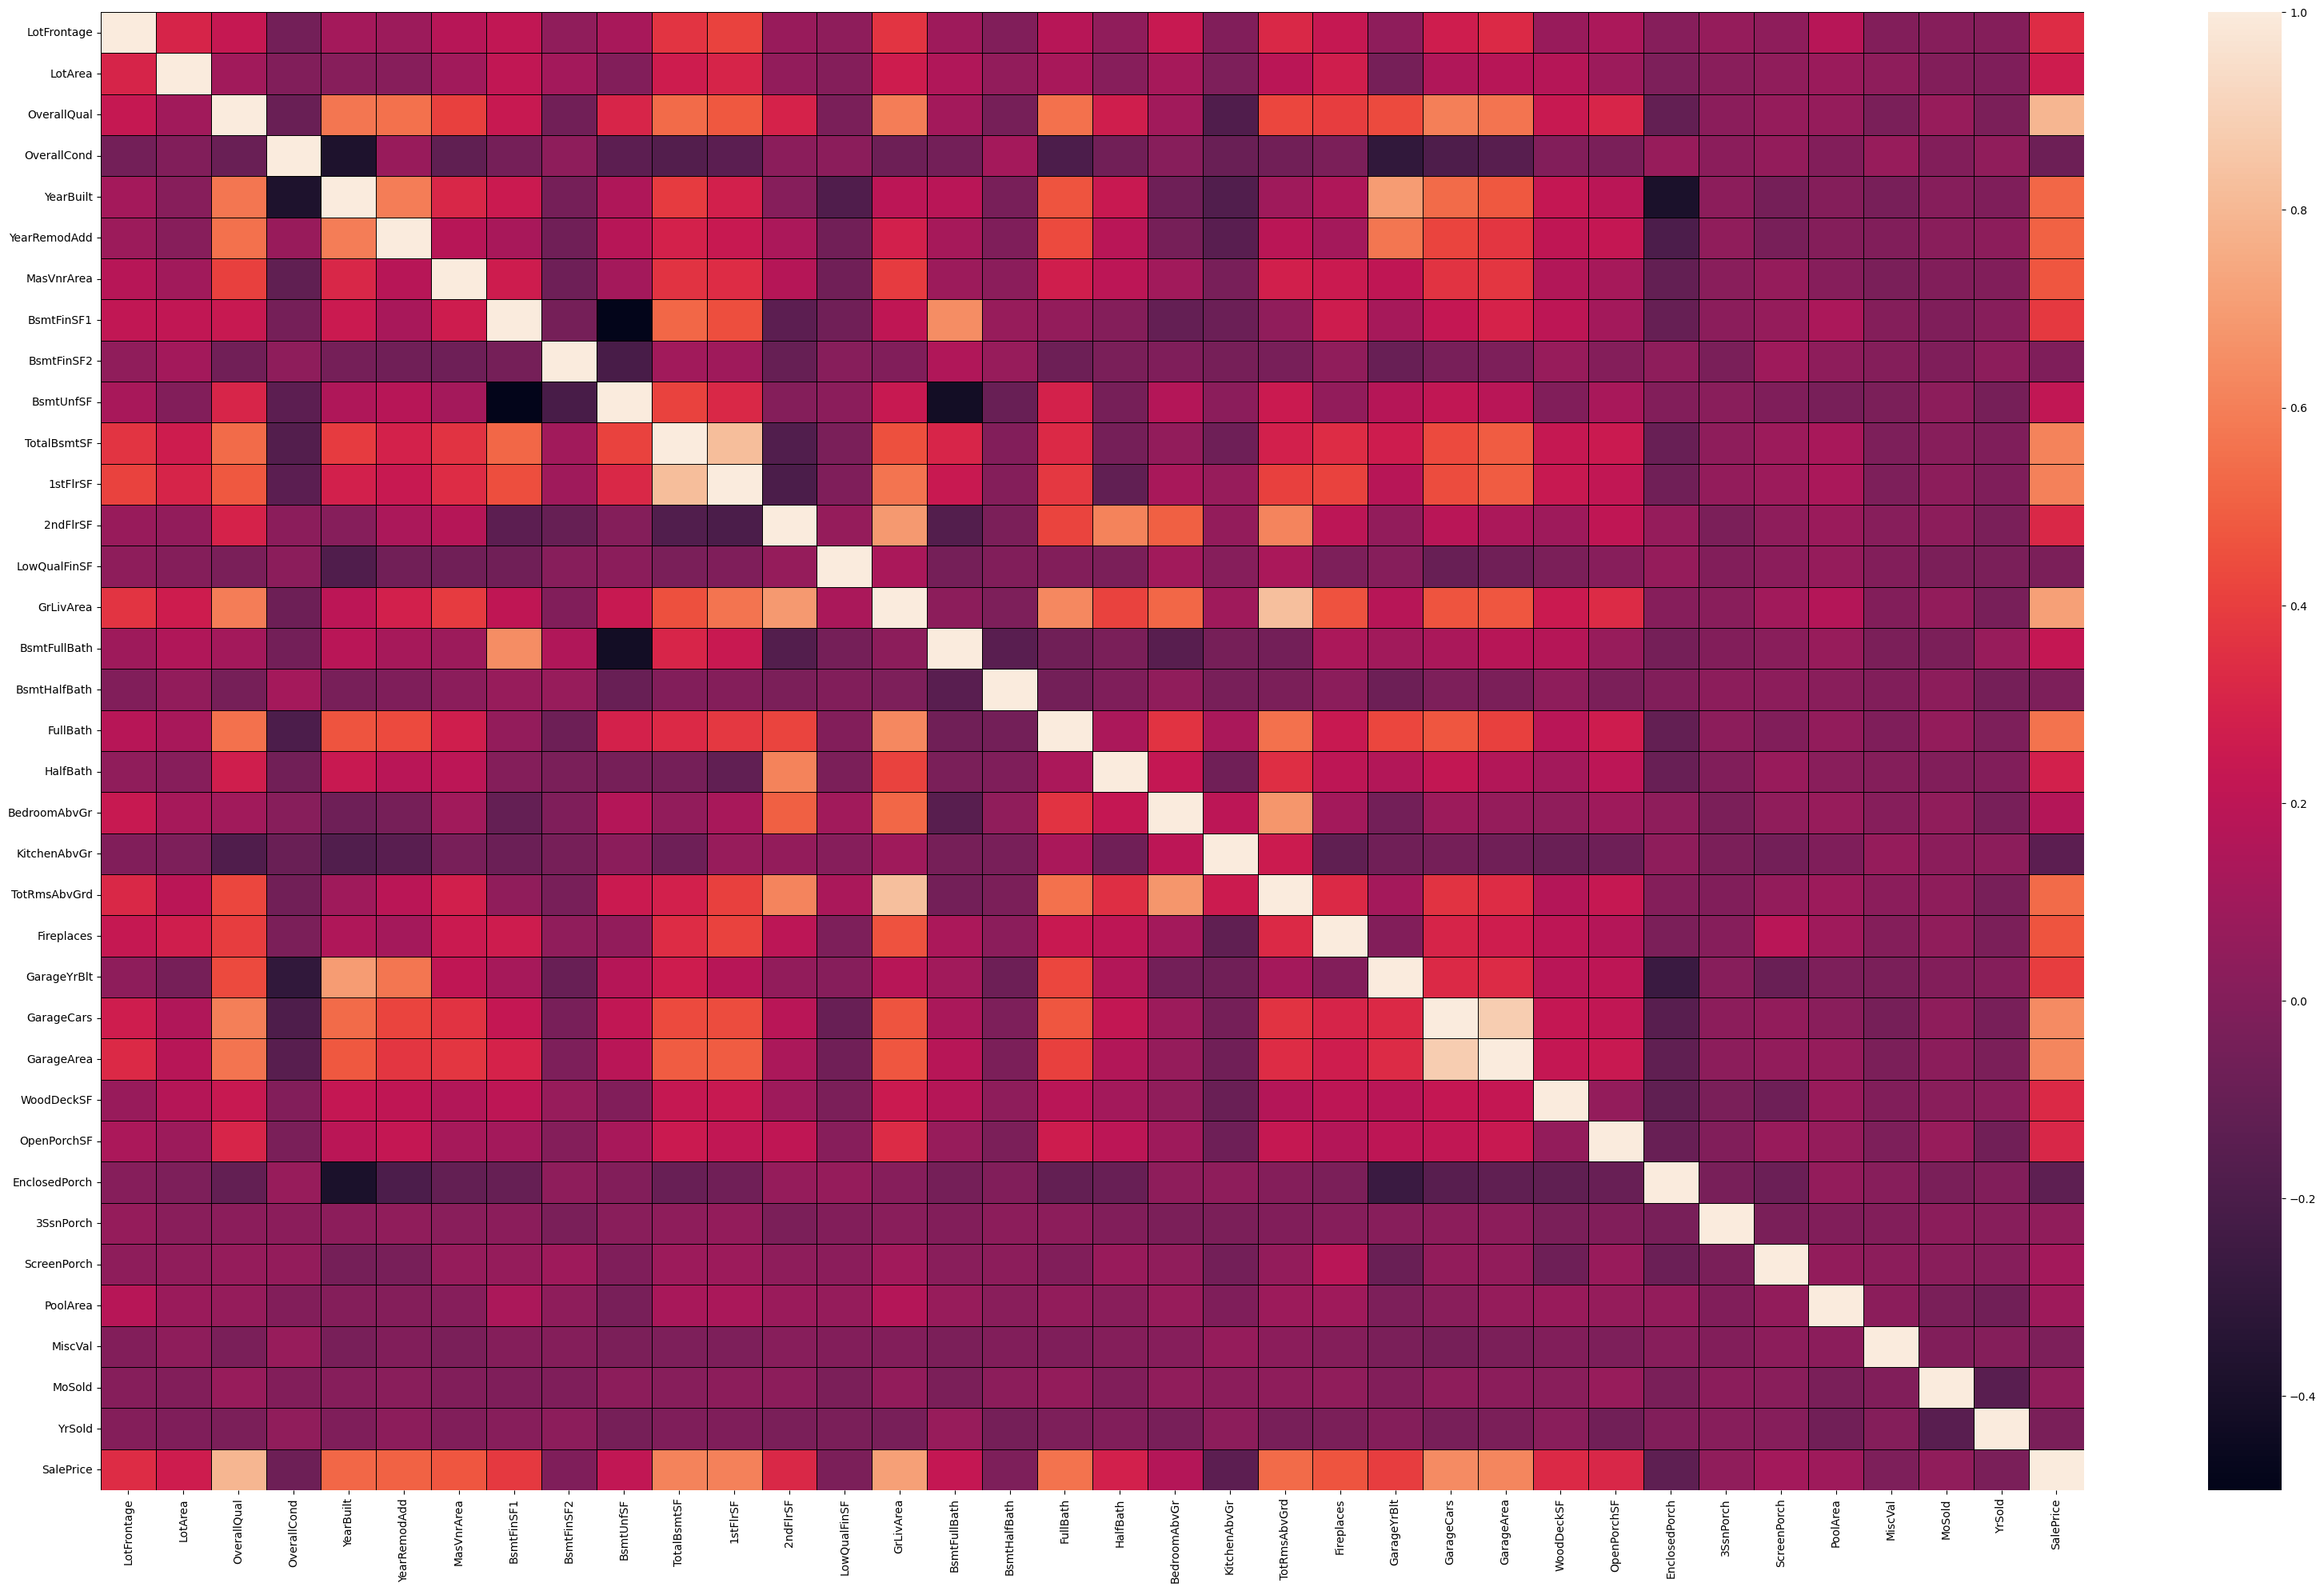

In [71]:
# Now, lets visualize the correlation between numerical data using a heatmap.
plt.figure(figsize=(40, 24))
sns.heatmap(housing_data.corr(numeric_only = True), linewidths = 0.5, linecolor = "black")
plt.show()

#### Observations:
1. Build year of garage is strongly correlated to build year of house which makese sense as in most houses garages would've been built along with house.
2. Above ground living area is strongly correlated to total rooms above ground which also makes complete sense as higher the area more number of rooms can be constructed.
3. Overall quality of material and finish of the house is directly related to the sale price.
4. Garage area is positively correlated to number of cars that can be accomodated in the car.
5. Area of first floor is positively correlated to area of basement.

In [72]:
# Now lets visualize the relation between sale price and categorical features
categorical_columns = ["MSSubClass", "MSZoning", "Street", "LotShape", "LandContour", 
                       "Utilities", "LotConfig", "LandSlope", "Neighborhood", "Condition1", "Condition2", 
                       "BldgType", "HouseStyle", "RoofStyle", "RoofMatl", "Exterior1st", "Exterior2nd", 
                       "MasVnrType", "ExterQual", "ExterCond", "Foundation", "BsmtQual", "BsmtCond", 
                       "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "Heating", "HeatingQC", 
                       "CentralAir", "Electrical", "KitchenQual", "Functional", "FireplaceQu", 
                       "GarageType", "GarageFinish", "GarageQual", "GarageCond", "PavedDrive", 
                       "SaleType", "SaleCondition"]
plt.figure(figsize=(140, 100))

for idx, x_var in enumerate(categorical_columns):
    plt.subplot(10, 4, idx + 1)
    sns.boxplot(x = x_var, y = "SalePrice", data = housing_data)

plt.show()

#### Observations:
1. 2 story houses have highest sale prices.
2. Houses on paved streets have more sale price.
3. Houses near positive off-site feature-park, greenbelt have higher sale prices.
4. Wood Shakes used as roof material drives up the sale price.
5. Obviously, excellent material quality drives up the sale price.
6. Most houses have Standard Circuit Breakers & Romex and that is usually a good indicator of high sale price.
7. Houses with partial sales condition have the highest prices. These are the houses which were not completed when last assessed, which usually means new construction. This makes sense as newly constructed houses will have a higher sale price.

### Step 3: Model Building

#### Categorical variable transformation

In [73]:
categorical_ordinal_columns = ["GarageQual", "GarageCond", "GarageFinish", "KitchenQual", 
                              "FireplaceQu", "HeatingQC", "BsmtFinType1", "BsmtFinType2", 
                              "BsmtExposure", "BsmtCond", "BsmtQual", "ExterCond", "ExterQual"]
housing_data[categorical_ordinal_columns].head()

,GarageQual,GarageCond,GarageFinish,KitchenQual,FireplaceQu,HeatingQC,BsmtFinType1,BsmtFinType2,BsmtExposure,BsmtCond,BsmtQual,ExterCond,ExterQual
0,TA,TA,RFn,Gd,Gd,Ex,GLQ,Unf,No,TA,Gd,TA,Gd
1,TA,TA,RFn,TA,TA,Ex,ALQ,Unf,Gd,TA,Gd,TA,TA
2,TA,TA,RFn,Gd,TA,Ex,GLQ,Unf,Mn,TA,Gd,TA,Gd
3,TA,TA,Unf,Gd,Gd,Gd,ALQ,Unf,No,Gd,TA,TA,TA
4,TA,TA,RFn,Gd,TA,Ex,GLQ,Unf,Av,TA,Gd,TA,Gd


In [74]:
# For categorical ordinal data, we can use Label Encoding instead of One Hot Encoding to minimize creation of new columns.
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

for column in categorical_ordinal_columns:
    housing_data[column] = label_encoder.fit_transform(housing_data[column])

housing_data[categorical_ordinal_columns].head()

,GarageQual,GarageCond,GarageFinish,KitchenQual,FireplaceQu,HeatingQC,BsmtFinType1,BsmtFinType2,BsmtExposure,BsmtCond,BsmtQual,ExterCond,ExterQual
0,4,4,1,2,2,0,2,5,3,3,2,4,2
1,4,4,1,3,4,0,0,5,1,3,2,4,3
2,4,4,1,2,4,0,2,5,2,3,2,4,2
3,4,4,2,2,2,2,0,5,3,1,3,4,3
4,4,4,1,2,4,0,2,5,0,3,2,4,2


In [75]:
# For categorical non ordinal columns, use one hot encoding as there is no ordering to be maintained.
categorical_non_ordinal_columns = list(set(categorical_columns) - set(categorical_ordinal_columns))

for column in categorical_non_ordinal_columns:
    dummy_cols = pd.get_dummies(housing_data[column], prefix=column, drop_first = True).astype(int)
    housing_data = pd.concat([housing_data, dummy_cols], axis = 1)

# Remove categorical non ordinal columns after adding dummies
housing_data.drop(columns = categorical_non_ordinal_columns, inplace = True)
print("Shape after adding dummy columns", housing_data.shape)

Shape after adding dummy columns (1460, 214)


In [76]:
housing_data.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,MSSubClass_1 story new,MSSubClass_1 story old,MSSubClass_1 story pud new,MSSubClass_1.5 story finished all ages,MSSubClass_1.5 story unfinished all ages,MSSubClass_2 family conversion all ages,MSSubClass_2 story new,MSSubClass_2 story old,MSSubClass_2 story pud new,MSSubClass_2.5 story all ages,MSSubClass_duplex all styles,MSSubClass_split foyer,MSSubClass_split multilevel,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,LandContour_HLS,LandContour_Low,LandContour_Lvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Condition1_Feedr,...,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,LandSlope_Mod,LandSlope_Sev,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,LotShape_IR2,LotShape_IR3,LotShape_Reg,CentralAir_Y,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,MasVnrType_BrkFace,MasVnrType_Stone,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng
0,65.0,8450,7,5,2003,2003,196.0,2,4,2,3,3,2,706,5,0,150,856,0,856,854,0,1710,1,0,2,1,3,1,2,8,0,2,2003.0,1,2,548,4,4,0,61,0,0,0,0,0,2,2008,208500,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,80.0,9600,6,8,1976,1976,0.0,3,4,2,3,1,0,978,5,0,284,1262,0,1262,0,0,1262,0,1,2,0,3,1,3,6,1,4,1976.0,1,2,460,4,4,298,0,0,0,0,0,0,5,2007,181500,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

#### Train test split

In [77]:
# Split the data into train and test through a 70:30 split.
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(housing_data, train_size = 0.7, random_state = 1)
print(train_data.shape)
print(test_data.shape)

(1021, 214)
(439, 214)


#### Numerical variable transformation

In [78]:
# Rescale training data numerical columns in [0, 1] range using a MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()
numerical_columns.append("SalePrice")
train_data[numerical_columns] = min_max_scaler.fit_transform(train_data[numerical_columns])

train_data.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,MSSubClass_1 story new,MSSubClass_1 story old,MSSubClass_1 story pud new,MSSubClass_1.5 story finished all ages,MSSubClass_1.5 story unfinished all ages,MSSubClass_2 family conversion all ages,MSSubClass_2 story new,MSSubClass_2 story old,MSSubClass_2 story pud new,MSSubClass_2.5 story all ages,MSSubClass_duplex all styles,MSSubClass_split foyer,MSSubClass_split multilevel,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,LandContour_HLS,LandContour_Low,LandContour_Lvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Condition1_Feedr,...,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,LandSlope_Mod,LandSlope_Sev,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,LotShape_IR2,LotShape_IR3,LotShape_Reg,CentralAir_Y,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,MasVnrType_BrkFace,MasVnrType_Stone,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng
208,0.164384,0.061062,0.666667,0.428571,0.840580,0.650000,0.080000,2,4,2,3,1,2,0.188696,5,0.0,0.039384,0.189362,0,0.194126,0.471154,0.0,0.325546,0.333333,0.0,0.666667,0.5,0.375,0.5,3,0.416667,0.333333,2,0.800000,0,0.5,0.320169,4,4,0.081522,0.100548,0.0,0.0,0.320833,0.0,0.000000,0.272727,0.25,0.332122,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
83,0.202055,0.035486,0.444444,0.428571,0.637681,0.1666

In [79]:
train_data[numerical_columns].describe()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000
mean,0.167993,0.043733,0.569594,0.517980,0.720798,0.590940,0.062495,0.079849,0.031067,0.241367,0.173534,0.191995,0.184054,0.009716,0.223591,0.147241,0.028404,0.521058,0.187071,0.361288,0.521058,0.378550,0.206334,0.722616,0.442214,0.333678,0.130316,0.085030,0.041072,0.006848,0.034239,0.003060,0.003415,0.479120,0.459843,0.198736
std,0.078729,0.048827,0.150714,0.160972,0.217949,0.342410,0.108177,0.082111,0.111920,0.187874,0.073384,0.090054,0.232449,0.084035,0.099830,0.172696,0.117891,0.179316,0.247080,0.100984,0.102886,0.135717,0.217129,0.229262,0.180795,0.147293,0.169129,0.121652,0.114068,0.060225,0.119609,0.049546,0.037804,0.243359,0.331705,0.107784
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.133562,0.029251,0.444444,0.428571,0.594203,0.300000,0.000000,0.000000,0.000000,0.095462,0.131260,0.127123,0.000000,0.000000,0.149209,0.000000,0.000000,0.333333,0.000000,0.250000,0.500000,0.250000,0.000000,0.554545,0.250000,0.224965,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.363636,0.250000,0.127428
50%,0.164384,0.038444,0.555556,0.428571,0.731884,0.733333,0.000000,0.070340,0.000000,0.205051,0.162684,0.174621,0.000000,0.000000,0.214017,0.000000,0.000000,0.666667,0.000000,0.375000,0.500000,0.333333,0.333333,0.763636,0.500000,0.338505,0.000000,0.047532,0.000000,0.000000,0.000000,0.000000,0.000000,0.454545,0.500000,0.173536
75%,0.198630,0.048326,0.666667,0.571429,0.934783,0.900000,0.103125,0.126506,0.000000,0.346747,0.213093,0.247820,0.394765,0.000000,0.274680,0.333333,0.000000,0.666667,0.500000,0.375000,0.500000,0.416667,0.333333,0.936364,0.500000,0.406206,0.228261,0.120658,0.000000,0.000000,0.000000,0.000000,0.000000,0.636364,0.750000,0.245354
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


All numerical columns are now in the range [0, 1]

In [80]:
# Split into X and y
y_train = train_data.pop("SalePrice")
X_train = train_data

#### Ridge regression with regularization

In [81]:
# List of various values of alpha to be used
params = {
    "alpha": [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 
              0.7, 0.8, 0.9, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20]
}

In [82]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

ridge = Ridge()
folds = 5
model_cv_ridge = GridSearchCV(estimator = ridge, 
                              param_grid = params, 
                              return_train_score = True, 
                              cv = folds, 
                              scoring = "neg_mean_absolute_error",
                              verbose = 1)
model_cv_ridge.fit(X_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 2, 3, 4, 5,
                                   6, 7, 8, 9, 10, 20]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [83]:
model_cv_ridge.best_params_

{'alpha': 6}

In [84]:
# Fit the Ridge model with optimal alpha value of 6
ridge_with_optimal_alpha = Ridge(alpha = model_cv_ridge.best_params_["alpha"])
ridge_with_optimal_alpha.fit(X_train, y_train)
ridge_with_optimal_alpha.coef_

array([-1.47709543e-02,  3.08431501e-02,  7.75017683e-02,  3.06012972e-02,
       -1.32456185e-03,  8.85938824e-03,  3.55130911e-02, -1.59297426e-02,
        9.74883554e-04, -1.12124828e-02,  2.20064263e-03, -6.78980889e-03,
       -1.89074062e-03,  2.31415213e-02, -8.78355371e-04,  8.70706155e-03,
       -4.80207506e-03,  2.16411306e-02, -6.25540268e-04,  4.52473976e-02,
        5.13948426e-02,  8.81168774e-03,  5.62244893e-02,  2.11333473e-02,
        5.79224246e-03,  4.26096188e-02,  1.52191240e-02,  9.81636849e-03,
       -1.60873402e-02, -1.14247857e-02,  5.23112784e-02,  3.96446461e-02,
       -2.74190917e-03, -1.91414927e-04, -5.80696608e-04,  5.03803395e-02,
        2.68094326e-02, -3.40779137e-04,  2.59411082e-03,  1.91458164e-02,
        1.32071756e-02,  4.61273583e-03,  9.87732651e-03,  1.80799949e-02,
       -1.94777101e-02, -2.51587883e-03, -7.09983217e-03, -4.21566011e-03,
       -1.19873746e-03,  7.92637624e-03,  1.32859416e-04, -8.58235318e-03,
        2.61771223e-03,  

In [85]:
from sklearn.metrics import r2_score, mean_squared_error

y_train_pred_ridge = ridge_with_optimal_alpha.predict(X_train)
print("r2 score on training data using ridge regression", r2_score(y_train, y_train_pred_ridge).round(2))
print("mean squared error on training data using ridge regression", mean_squared_error(y_train, y_train_pred_ridge).round(4))

r2 score on training data using ridge regression 0.88
mean squared error on training data using ridge regression 0.0014


#### Lasso regression with regularization

In [86]:
from sklearn.linear_model import Lasso

lasso = Lasso()
folds = 5
model_cv_lasso = GridSearchCV(estimator = lasso, 
                              param_grid = params, 
                              return_train_score = True, 
                              cv = folds, 
                              scoring = "neg_mean_absolute_error",
                              verbose = 1)
model_cv_lasso.fit(X_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 2, 3, 4, 5,
                                   6, 7, 8, 9, 10, 20]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [87]:
model_cv_lasso.best_params_

{'alpha': 0.0001}

In [88]:
# Fit the Lasso model with optimal alpha value of 0.0001
lasso_with_optimal_alpha = Lasso(alpha = model_cv_lasso.best_params_["alpha"])
lasso_with_optimal_alpha.fit(X_train, y_train)
lasso_with_optimal_alpha.coef_

array([-2.24912658e-02,  9.12717264e-02,  1.20721234e-01,  3.94476550e-02,
        0.00000000e+00,  4.19705245e-03,  3.67525155e-02, -1.33581260e-02,
        1.82573168e-03, -9.15189162e-03,  1.70688691e-03, -6.18685305e-03,
       -1.94370665e-03,  6.95455763e-03, -1.60576446e-03,  0.00000000e+00,
       -1.47377307e-02,  0.00000000e+00, -8.10798908e-04,  0.00000000e+00,
        1.76321062e-02, -0.00000000e+00,  2.40760118e-01,  2.08482148e-02,
        0.00000000e+00,  3.06593619e-02,  8.50754596e-03, -0.00000000e+00,
       -3.35051964e-02, -9.29951112e-03,  4.21534191e-02,  3.00071176e-02,
       -2.47275687e-03,  0.00000000e+00, -1.02887359e-04,  6.65724278e-02,
        0.00000000e+00,  6.47727116e-04,  8.98573301e-04,  1.45737598e-02,
        7.55956230e-03,  0.00000000e+00,  0.00000000e+00,  1.84374206e-02,
       -2.73361126e-02, -0.00000000e+00, -6.28760710e-03, -2.27341230e-03,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  

In [89]:
y_train_pred_lasso = lasso_with_optimal_alpha.predict(X_train)
print("r2 score on training data using lasso regression", r2_score(y_train, y_train_pred_lasso).round(2))
print("mean squared error on training data using lasso regression", mean_squared_error(y_train, y_train_pred_lasso).round(4))

r2 score on training data using lasso regression 0.89
mean squared error on training data using lasso regression 0.0013


In [90]:
# Lets find significant features obtained for both regressions.
def find_significant_features(train, coeff, type):
    template = "{type} coefficient"
    coefficient_column = template.format(type = type)
    significant_features_df = pd.DataFrame({"Feature": train.columns, coefficient_column: coeff})
    significant_features_df.sort_values(by=[coefficient_column], ascending = False, inplace = True)
    return significant_features_df

In [91]:
# Significant features using Ridge regression
significant_features_df = find_significant_features(X_train, ridge_with_optimal_alpha.coef_, "Ridge")
significant_features_df.head(10)

,Feature,Ridge coefficient
2,OverallQual,0.077502
125,RoofMatl_WdShngl,0.067325
87,Neighborhood_StoneBr,0.058668
22,GrLivArea,0.056224
30,TotRmsAbvGrd,0.052311
20,2ndFlrSF,0.051395
35,GarageCars,0.050380
19,1stFlrSF,0.045247
25,FullBath,0.042610
80,Neighborhood_NoRidge,0.042288


In [92]:
# Significant features using Lasso regression
significant_features_df = find_significant_features(X_train, lasso_with_optimal_alpha.coef_, "Lasso")
significant_features_df.head(10)

,Feature,Lasso coefficient
22,GrLivArea,0.240760
125,RoofMatl_WdShngl,0.152332
2,OverallQual,0.120721
1,LotArea,0.091272
87,Neighborhood_StoneBr,0.077871
35,GarageCars,0.066572
81,Neighborhood_NridgHt,0.053111
80,Neighborhood_NoRidge,0.044868
30,TotRmsAbvGrd,0.042153
3,OverallCond,0.039448


#### Observations:
1. Both ridge and lasso regression have returned optimal models with a r2 score of ~0.88.
2. There are a lot of significant common features obtained through both regression techniques like living area, overall quality, total rooms above ground, neighborhood near stone brook etc.

### Step 4: Model Evaluation

#### Apply scaling on test data

In [93]:
test_data[numerical_columns] = min_max_scaler.transform(test_data[numerical_columns])
test_data.describe()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,MSSubClass_1 story new,MSSubClass_1 story old,MSSubClass_1 story pud new,MSSubClass_1.5 story finished all ages,MSSubClass_1.5 story unfinished all ages,MSSubClass_2 family conversion all ages,MSSubClass_2 story new,MSSubClass_2 story old,MSSubClass_2 story pud new,MSSubClass_2.5 story all ages,MSSubClass_duplex all styles,MSSubClass_split foyer,MSSubClass_split multilevel,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,LandContour_HLS,LandContour_Low,LandContour_Lvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Condition1_Feedr,...,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,LandSlope_Mod,LandSlope_Sev,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,LotShape_IR2,LotShape_IR3,LotShape_Reg,CentralAir_Y,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,MasVnrType_BrkFace,MasVnrType_Stone,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng
count,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.0,439.0,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.00

#### Split test data into X_test, y_test

In [94]:
y_test = test_data.pop("SalePrice")
X_test = test_data

In [95]:
# Evaluate ridge model on test data
y_test_pred_ridge = ridge_with_optimal_alpha.predict(X_test)
print("Ridge r2 score on test data", r2_score(y_test, y_test_pred_ridge).round(2))
print("Ridge mean squared error on test data", mean_squared_error(y_test, y_test_pred_ridge).round(4))

Ridge r2 score on test data 0.86
Ridge mean squared error on test data 0.002


In [96]:
# Evaluate lasso model on test data
y_test_pred_lasso = lasso_with_optimal_alpha.predict(X_test)
print("Lasso r2 score on test data", r2_score(y_test, y_test_pred_lasso).round(2))
print("Lasso mean squared error on test data", mean_squared_error(y_test, y_test_pred_lasso).round(4))

Lasso r2 score on test data 0.86
Lasso mean squared error on test data 0.0019


Text(0.5, 0, 'Errors')

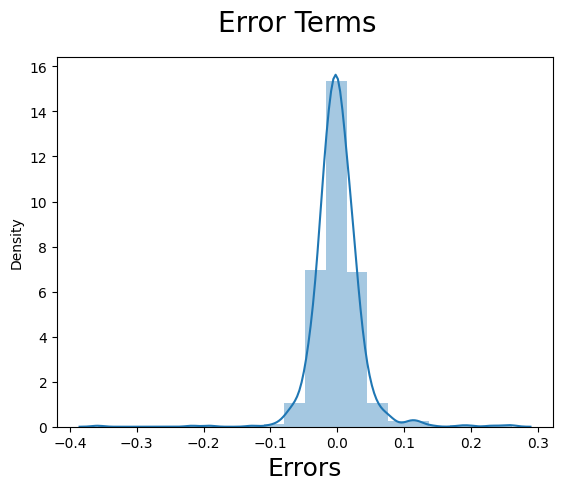

In [97]:
# Residual error plot on training data
fig = plt.figure()
sns.distplot((y_train - y_train_pred_lasso), bins = 20)
fig.suptitle("Error Terms", fontsize = 20)
plt.xlabel("Errors", fontsize = 18)

Text(0.5, 0, 'Errors')

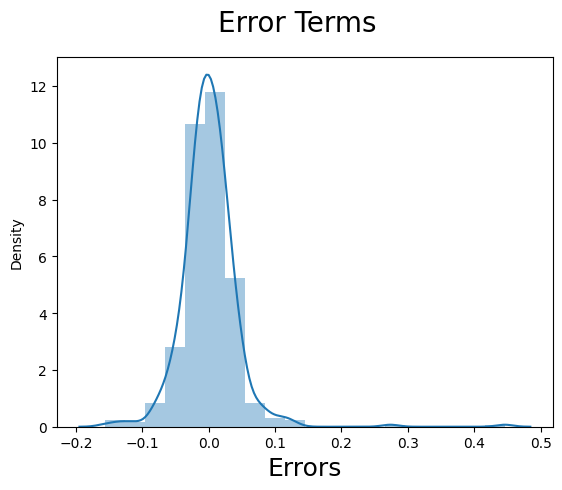

In [98]:
# Residual error plot on test data
fig = plt.figure()
sns.distplot((y_test - y_test_pred_lasso), bins = 20)
fig.suptitle("Error Terms", fontsize = 20)
plt.xlabel("Errors", fontsize = 18)

Text(0, 0.5, 'y_test_pred_ridge')

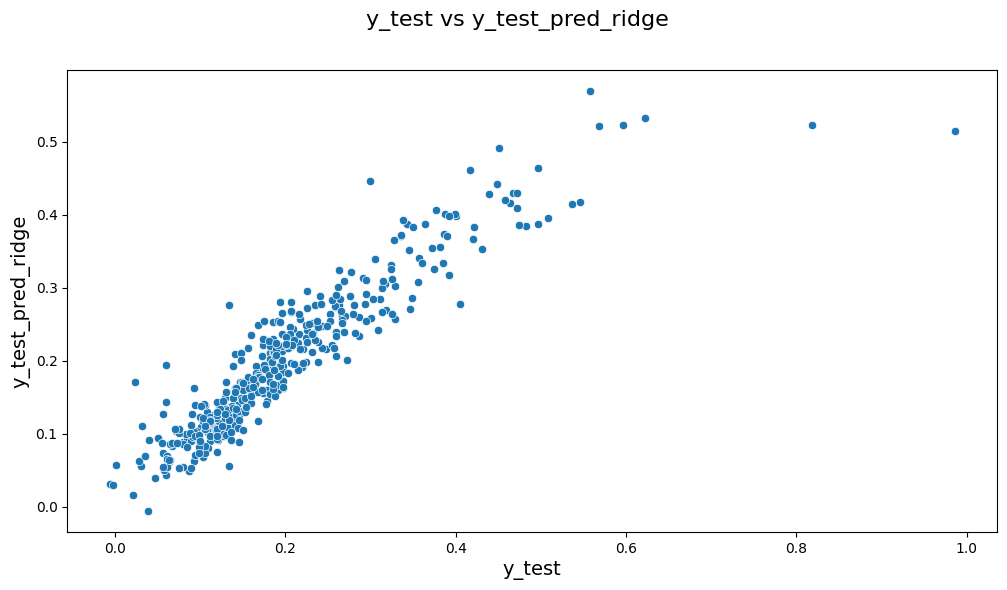

In [99]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure(figsize=(12, 6))
sns.scatterplot(x = y_test, y = y_test_pred_ridge)
fig.suptitle('y_test vs y_test_pred_ridge', fontsize=16)
plt.xlabel('y_test', fontsize=14)
plt.ylabel('y_test_pred_ridge', fontsize=14)

Text(0, 0.5, 'y_test_pred_lasso')

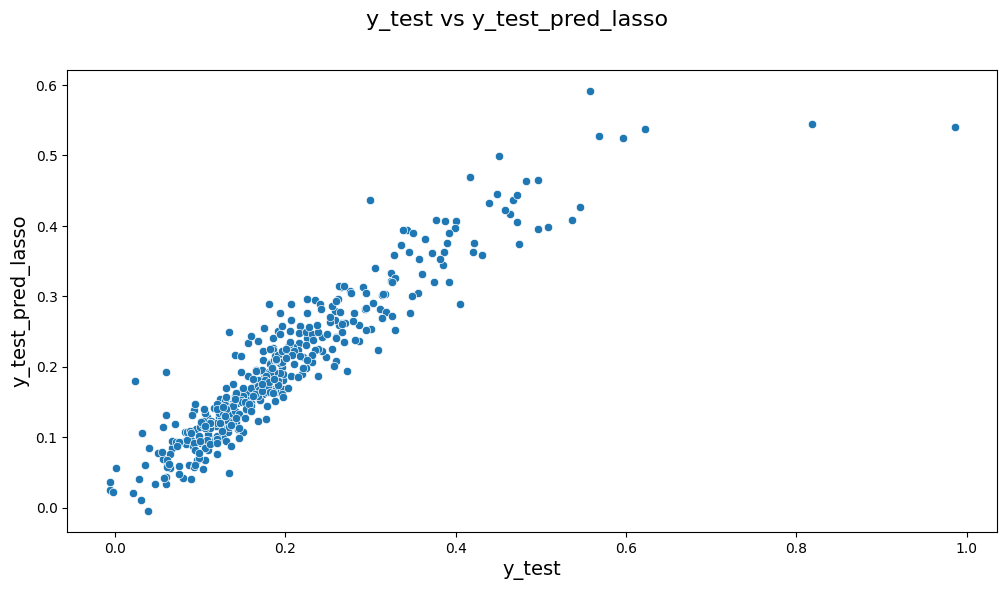

In [100]:
fig = plt.figure(figsize=(12, 6))
sns.scatterplot(x = y_test, y = y_test_pred_lasso)
fig.suptitle('y_test vs y_test_pred_lasso', fontsize=16)
plt.xlabel('y_test', fontsize=14)
plt.ylabel('y_test_pred_lasso', fontsize=14)

We can see that assumptions of linear regression are maintained as the error terms follow a normal distribution.

### Experiments for subjective questions

In [101]:
# Lets double the optimal alpha value obtained for both regressions.
ridge_2 = Ridge(alpha = 2 * model_cv_ridge.best_params_["alpha"])
lasso_2 = Lasso(alpha = 2 * model_cv_lasso.best_params_["alpha"])

ridge_2.fit(X_train, y_train)
lasso_2.fit(X_train, y_train)

y_train_pred_ridge_2 = ridge_2.predict(X_train)
y_train_pred_lasso_2 = lasso_2.predict(X_train)

print("Ridge errors", r2_score(y_train, y_train_pred_ridge_2).round(2), mean_squared_error(y_train, y_train_pred_ridge_2).round(4))
print("Lasso errors", r2_score(y_train, y_train_pred_lasso_2).round(2), mean_squared_error(y_train, y_train_pred_lasso_2).round(4))

Ridge errors 0.87 0.0016
Lasso errors 0.88 0.0014


In [102]:
df = find_significant_features(X_train, ridge_2.coef_, "Ridge")
df.head(10)

,Feature,Ridge coefficient
2,OverallQual,0.062000
87,Neighborhood_StoneBr,0.045928
30,TotRmsAbvGrd,0.045415
35,GarageCars,0.045266
22,GrLivArea,0.044791
125,RoofMatl_WdShngl,0.043106
20,2ndFlrSF,0.042406
31,Fireplaces,0.039601
25,FullBath,0.039239
80,Neighborhood_NoRidge,0.039229


In [103]:
df = find_significant_features(X_train, lasso_2.coef_, "Lasso")
df.head(10)

,Feature,Lasso coefficient
22,GrLivArea,0.194023
2,OverallQual,0.121346
125,RoofMatl_WdShngl,0.120627
87,Neighborhood_StoneBr,0.073211
35,GarageCars,0.069300
81,Neighborhood_NridgHt,0.048713
80,Neighborhood_NoRidge,0.045627
30,TotRmsAbvGrd,0.044560
31,Fireplaces,0.034834
3,OverallCond,0.033969


In [104]:
# Drop top 5 features obtained for both regressions
ridge_top5 = ["OverallQual", "RoofMatl_WdShngl", "Neighborhood_StoneBr", "GrLivArea", "TotRmsAbvGrd"]
lasso_top5 = ["GrLivArea", "RoofMatl_WdShngl", "OverallQual", "LotArea", "Neighborhood_StoneBr"]

def build_model_after_dropping_top5_features(isRidge):
    X_train_new = X_train.copy()
    y_train_new = y_train.copy()
    
    if isRidge:
        X_train_new = X_train_new.drop(columns = ridge_top5)
        y_train_new = y_train_new.drop(columns = ridge_top5)
    else:
        X_train_new = X_train_new.drop(columns = lasso_top5)
        y_train_new = y_train_new.drop(columns = lasso_top5)

    model = Ridge() if isRidge else Lasso()
    folds = 5
    model_cv = GridSearchCV(estimator = model, 
                                  param_grid = params, 
                                  return_train_score = True, 
                                  cv = folds, 
                                  scoring = "neg_mean_absolute_error",
                                  verbose = 1)
    model_cv.fit(X_train_new, y_train_new)
    return model_cv, X_train_new, y_train_new

In [105]:
ridge_new, X_train_ridge, y_train_ridge = build_model_after_dropping_top5_features(True)
ridge_new.best_params_

Fitting 5 folds for each of 24 candidates, totalling 120 fits


{'alpha': 7}

In [107]:
ridge_new = Ridge(alpha = 7)
ridge_new.fit(X_train_ridge, y_train_ridge)
find_significant_features(X_train_ridge, ridge_new.coef_, "Ridge new").head(10)

,Feature,Ridge new coefficient
19,2ndFlrSF,0.068611
18,1stFlrSF,0.066394
32,GarageCars,0.057380
23,FullBath,0.055951
28,Fireplaces,0.046703
5,MasVnrArea,0.040514
77,Neighborhood_NoRidge,0.039833
33,GarageArea,0.035458
16,TotalBsmtSF,0.031917
1,LotArea,0.031368


In [108]:
lasso_new, X_train_lasso, y_train_lasso = build_model_after_dropping_top5_features(False)
lasso_new.best_params_

Fitting 5 folds for each of 24 candidates, totalling 120 fits


{'alpha': 0.0001}

In [109]:
lasso_new = Lasso(alpha = 0.0001)
lasso_new.fit(X_train_lasso, y_train_lasso)
find_significant_features(X_train_lasso, lasso_new.coef_, "Lasso new").head(10)

,Feature,Lasso new coefficient
17,1stFlrSF,0.243833
18,2ndFlrSF,0.122948
32,GarageCars,0.077445
1,OverallCond,0.047000
4,MasVnrArea,0.046342
27,TotRmsAbvGrd,0.046091
86,LandContour_HLS,0.039945
22,FullBath,0.039147
78,Neighborhood_NridgHt,0.039030
77,Neighborhood_NoRidge,0.036935
